In [1]:
import tables
import numpy as np
from ctapipe.instrument.camera import CameraGeometry 
import astropy.units as unit
import matplotlib.pyplot as plt
from scipy.interpolate import griddata
import matplotlib

In [2]:
# DATA ACQUISITION

# open file with data
data_path = '/mnt/Dati/CTA_DATA_EXT/data/orig/gamma-diffuse_20deg_180deg_runs811-1000___cta-prod3-demo-2147m-LaPalma-baseline-mono.h5'
data = tables.open_file(data_path)
print(data)
# acquire the data
data_einfo = data.root.Events
data_LST = data.root.LST_LSTCam

/mnt/Dati/CTA_DATA_EXT/data/orig/gamma-diffuse_20deg_180deg_runs811-1000___cta-prod3-demo-2147m-LaPalma-baseline-mono.h5 (File) ''
Last modif.: 'Tue Nov 12 19:39:50 2019'
Object Tree: 
/ (RootGroup) ''
/Array_Information (Table(4,), shuffle, lzo(1)) 'Table of array/subarray information'
/Events (Table(12290,), shuffle, lzo(1)) 'Table of Event Information'
/LST_LSTCam (Table(24440,), shuffle, lzo(1)) 'Table of LST:LSTCam images'
/Telescope_Type_Information (Table(1,), shuffle, lzo(1)) 'Table of telescope type information'



In [3]:
# LST data
LST_event_index = [x['event_index'] for x in data_LST.iterrows()]		#OK
LST_image_charge = [x['charge'] for x in data_LST.iterrows()]		#OK 'image_charge' -> 'charge' 
LST_image_peak_times = [x['peakpos'] for x in data_LST.iterrows()]	#OK? 'peak_times' -> 'peakpos'

In [4]:
# define LST camera
cam = CameraGeometry.from_name('LSTCam')

In [5]:
# Define x & y coords of the LSTCam
x = cam.pix_x
y = cam.pix_y
print('Type of x: {}\nType of y: {}'.format(type(x), type(y)))

Type of x: <class 'astropy.units.quantity.Quantity'>
Type of y: <class 'astropy.units.quantity.Quantity'>


In [6]:
x_adim = x/unit.meter
points = np.array([np.array(cam.pix_x / unit.m),
                   np.array(cam.pix_y / unit.m)]).T

In [7]:
points.shape

(1855, 2)

In [8]:
print('x max: {}, \nx min: {}'.format(x.max(), x.min()))

x max: 1.171686293234585 m, 
x min: -1.171686293234585 m


In [9]:
print('y max: {}, \ny min: {}'.format(y.max(), y.min()))

y max: 1.0801816210197972 m, 
y min: -1.0801816210197972 m


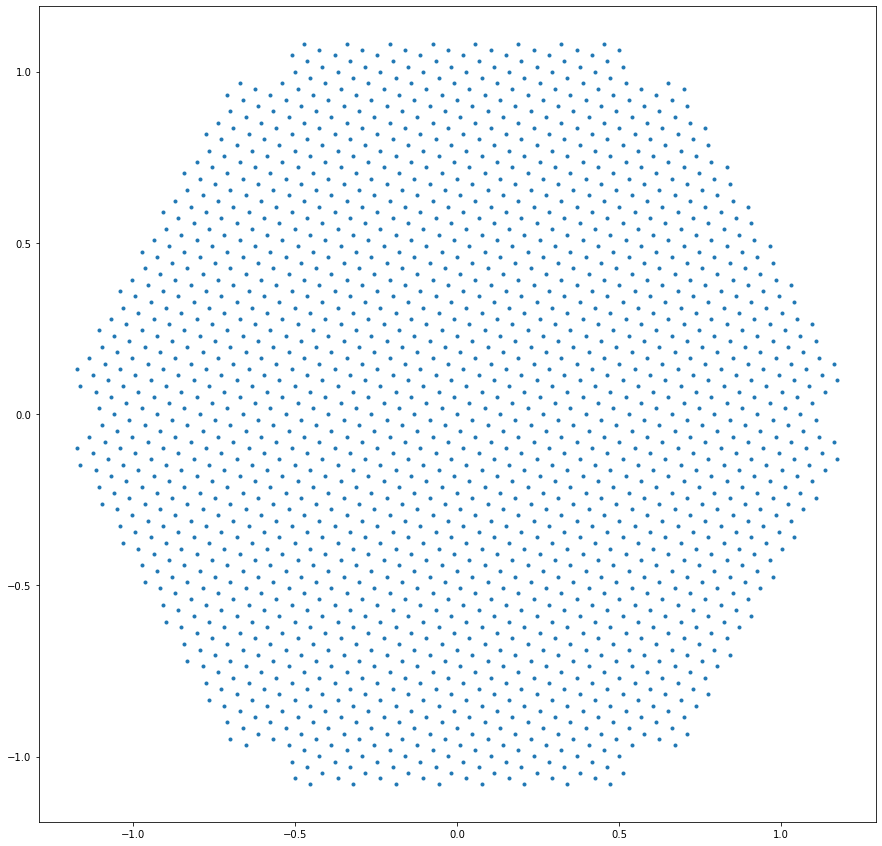

In [10]:
fig = plt.figure(figsize=(15, 15))
fig.tight_layout()
#plt.xlim([-1.5,1.5])
plt.scatter(points[:,:1], points[:,1:2],marker='.')

In [11]:
rows,cols = 96, 88
grid_x, grid_y = np.mgrid[-1.20:1.20:rows*1j, -1.10:1.10:cols*1j]
#rows,cols = 100, 100
#grid_x, grid_y = np.mgrid[-1.25:1.25:rows*1j, -1.25:1.25:cols*1j]

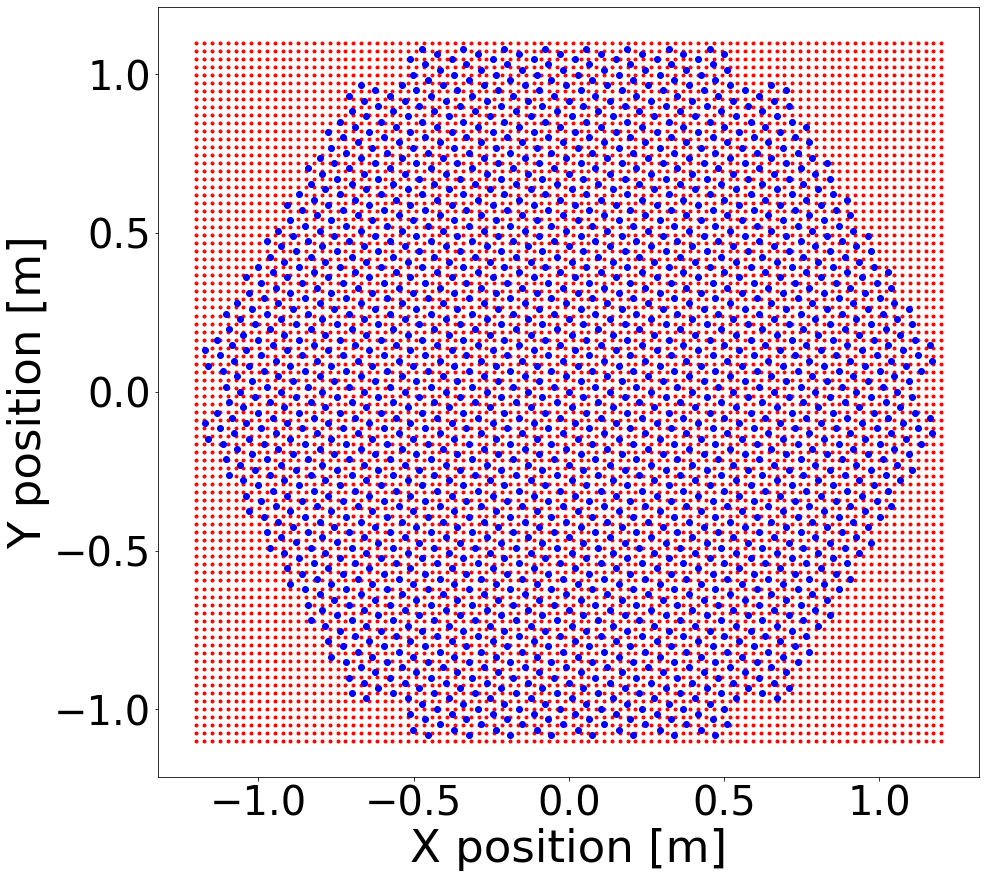

In [12]:
fig = plt.figure(figsize=(13.5, 12))
fig.tight_layout()
matplotlib.rcParams.update({'font.size': 40})
matplotlib.rcParams.update({'axes.labelsize': 40})
plt.scatter(grid_x, grid_y, marker = '.', c = 'red')
plt.scatter(points[:,0], points[:,1],marker='o', c = 'blue')
plt.xlabel('X position [m]', fontsize=45)
plt.ylabel('Y position [m]', fontsize=45)
plt.tight_layout(pad=0)
#plt.grid()
plt.savefig("/mnt/Dati/CTA/PRESENTATION/fig/meshgrid.pdf", bbox_inches='tight')
plt.savefig("/mnt/Dati/CTA/PRESENTATION/fig/meshgrid.png", bbox_inches='tight')


Now I extract the charge from a single LST

In [13]:
e_idx = 1004
charge = LST_image_charge[e_idx]

In [14]:
new_grid = griddata(points, charge, (grid_x, grid_y), method = 'cubic', fill_value=0)

In [15]:
new_grid

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

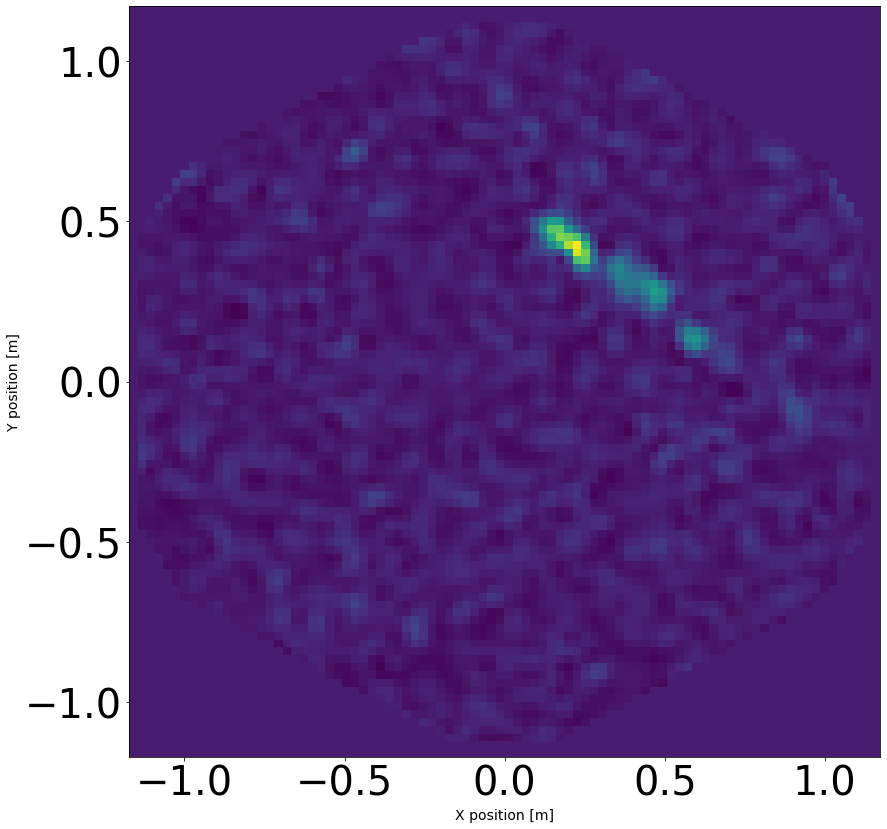

In [16]:
plt.figure(figsize=(12,12))
plt.imshow(new_grid, extent=(points.min(), points.max(), points.min(), points.max()), origin='lower')
plt.xlabel('X position [m]', fontsize=14)
plt.ylabel('Y position [m]', fontsize=14)
plt.tight_layout(pad=0)